<a href="https://colab.research.google.com/github/JMJ-01/JMJ-01.github.io-scientific-programs/blob/main/Quantum_yield_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main function to work on

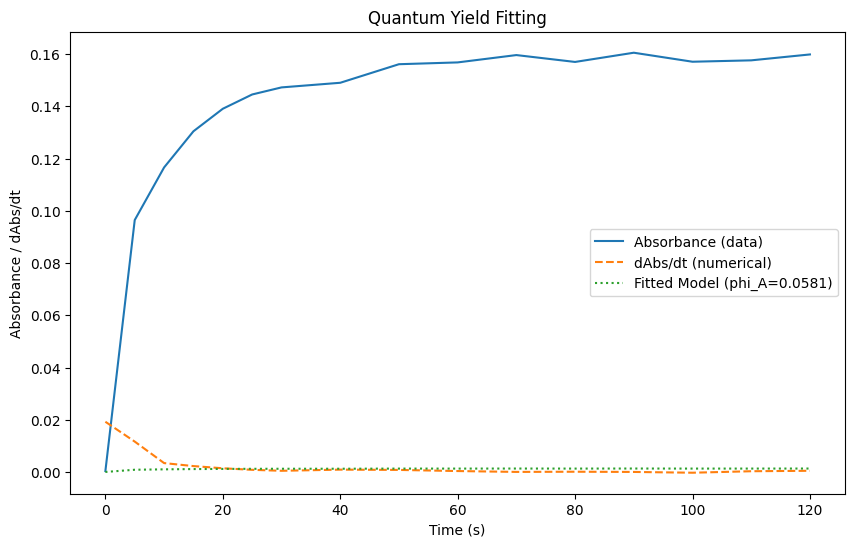

Fitted Quantum Yield (phi_A): 0.0581


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Constants (to be replaced with your values)
epsilon_A = 10785  # Molar extinction coefficient (L mol^-1 cm^-1)
I = 1.022*10**15       # Light intensity (photons s^-1 cm^-2)
N_A = 6.022*10**23   # Avogadro's number (mol^-1)
area = 0.25       # Area in cm²

# 1. Load data from Excel
data = pd.read_excel("UV.xlsx")  # Replace with your Excel file name
time = data['Time'].values  # Time in seconds
absorbance = data['Absorbance'].values

# 2. Calculate numerical derivative
def numerical_derivative(time, absorbance):
    derivative = np.zeros_like(absorbance)
    h = time[1] - time[0]  # Assuming uniform time intervals

    # Central difference for interior points
    derivative[1:-1] = (absorbance[2:] - absorbance[:-2]) / (2 * h)

    # Forward and backward difference for boundaries
    derivative[0] = (absorbance[1] - absorbance[0]) / h
    derivative[-1] = (absorbance[-1] - absorbance[-2]) / h

    return derivative

dAbs_dt = numerical_derivative(time, absorbance)

# Use the absolute value of the derivative
dAbs_dt_abs = dAbs_dt

# 3. Define the model function
def model_function(t, phi_A):
    absorbance_interp = np.interp(t, time, absorbance)  # Interpolate absorbance
    return phi_A * epsilon_A * 1000 * I * (1 - 10**(-absorbance_interp)) / (N_A * area)

# 4. Fit the data
initial_guess = [0.01]  # Initial guess for phi_A
params, covariance = curve_fit(model_function, time, dAbs_dt_abs, p0=initial_guess)

# Extract fitted quantum yield
phi_A_fitted = params[0]

# 5. Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, absorbance, label="Absorbance (data)")
plt.plot(time, dAbs_dt_abs, label="dAbs/dt (numerical)", linestyle='--')
plt.plot(time, model_function(time, phi_A_fitted), label=f"Fitted Model (phi_A={phi_A_fitted:.4f})", linestyle=':')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance / dAbs/dt")
plt.legend()
plt.title("Quantum Yield Fitting")
plt.show()


# 6. Output results
print(f"Fitted Quantum Yield (phi_A): {phi_A_fitted:.4f}")


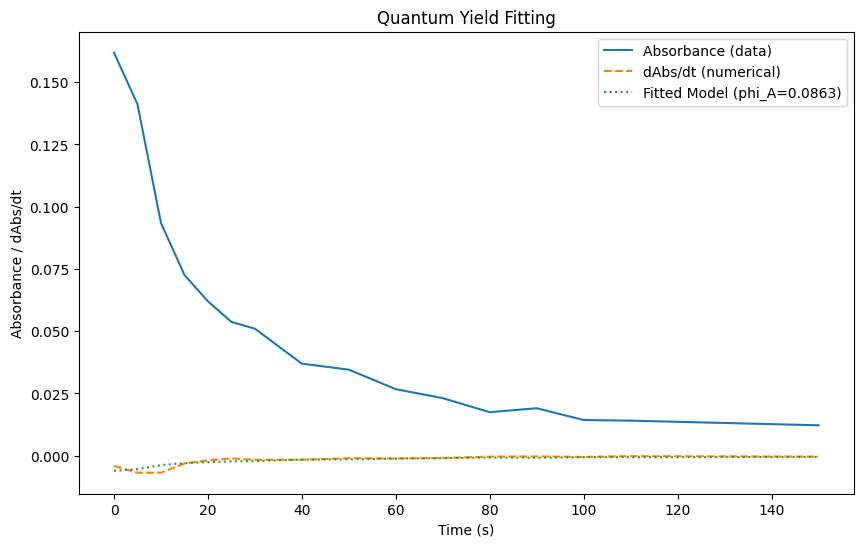

Fitted Quantum Yield (phi_A): 0.0863


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Constants (to be replaced with your values)
epsilon_A = 1369  # Molar extinction coefficient (L mol^-1 cm^-1)
I = 2.5*10**16       # Light intensity (photons s^-1 cm^-2)
N_A = 6.022*10**23   # Avogadro's number (mol^-1)
area = 0.25       # Area in cm²

# 1. Load data from Excel
data = pd.read_excel("WL.xlsx")  # Replace with your Excel file name
time = data['Time'].values  # Time in seconds
absorbance = data['Absorbance'].values

# 2. Calculate numerical derivative
def numerical_derivative(time, absorbance):
    derivative = np.zeros_like(absorbance)
    h = time[1] - time[0]  # Assuming uniform time intervals

    # Central difference for interior points
    derivative[1:-1] = (absorbance[2:] - absorbance[:-2]) / (2 * h)

    # Forward and backward difference for boundaries
    derivative[0] = (absorbance[1] - absorbance[0]) / h
    derivative[-1] = (absorbance[-1] - absorbance[-2]) / h

    return derivative

dAbs_dt = numerical_derivative(time, absorbance)

# Use the absolute value of the derivative
dAbs_dt_abs = dAbs_dt

# 3. Define the model function
def model_function(t, phi_A):
    absorbance_interp = np.interp(t, time, absorbance)  # Interpolate absorbance
    return -1*phi_A * epsilon_A * 1000 * I * (1 - 10**(-absorbance_interp)) / (N_A * area)

# 4. Fit the data
initial_guess = [0.01]  # Initial guess for phi_A
params, covariance = curve_fit(model_function, time, dAbs_dt_abs, p0=initial_guess)

# Extract fitted quantum yield
phi_A_fitted = params[0]

# 5. Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, absorbance, label="Absorbance (data)")
plt.plot(time, dAbs_dt_abs, label="dAbs/dt (numerical)", linestyle='--')
plt.plot(time, model_function(time, phi_A_fitted), label=f"Fitted Model (phi_A={phi_A_fitted:.4f})", linestyle=':')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance / dAbs/dt")
plt.legend()
plt.title("Quantum Yield Fitting")
plt.show()

# 6. Output results
print(f"Fitted Quantum Yield (phi_A): {phi_A_fitted:.4f}")


<ipython-input-3-92237da01f01>:42: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  absorbance_reconstructed = cumtrapz(dAbs_dt, time, initial=0) + absorbance_0
<ipython-input-3-92237da01f01>:46: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t) + c  # Example: Exponential decay


Fitted parameters: a=-0.1595, b=0.0981, c=0.1662


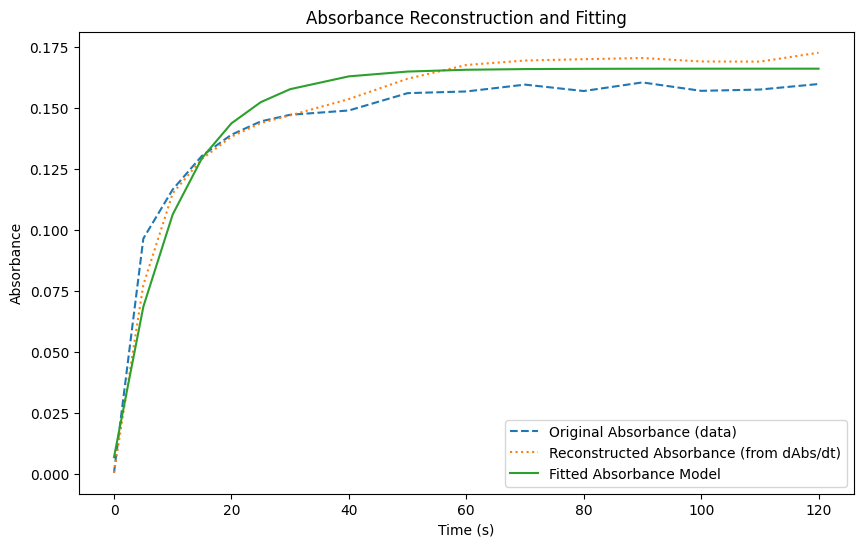

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

# Constants (to be replaced with your values)
epsilon_A = 1822.733  # Molar extinction coefficient (L mol^-1 cm^-1)
I = 1.022*10**16       # Light intensity (photons s^-1 cm^-2)
N_A = 6.022*10**23   # Avogadro's number (mol^-1)
area = 0.25       # Area in cm²

# 1. Load data from Excel
data = pd.read_excel("UV.xlsx")  # Replace with your Excel file name
time = data['Time'].values  # Time in seconds
absorbance = data['Absorbance'].values

# 2. Calculate numerical derivative
def numerical_derivative(time, absorbance):
    derivative = np.zeros_like(absorbance)
    h = time[1] - time[0]  # Assuming uniform time intervals

    # Central difference for interior points
    derivative[1:-1] = (absorbance[2:] - absorbance[:-2]) / (2 * h)

    # Forward and backward difference for boundaries
    derivative[0] = (absorbance[1] - absorbance[0]) / h
    derivative[-1] = (absorbance[-1] - absorbance[-2]) / h

    return derivative

dAbs_dt = numerical_derivative(time, absorbance)

# Use the absolute value of the derivative
dAbs_dt_abs = dAbs_dt

# 3. Numerical integration to reconstruct absorbance
# Initial absorbance value
absorbance_0 = absorbance[0]

# Compute numerical integral
absorbance_reconstructed = cumtrapz(dAbs_dt, time, initial=0) + absorbance_0

# 4. Define a candidate model for absorbance
def absorbance_model(t, a, b, c):
    return a * np.exp(-b * t) + c  # Example: Exponential decay

# Fit the absorbance model to the reconstructed data
params, covariance = curve_fit(absorbance_model, time, absorbance_reconstructed)

# Extract fitted parameters
a, b, c = params
print(f"Fitted parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")

# Generate the fitted absorbance model
absorbance_fitted = absorbance_model(time, *params)

# 5. Plot and Compare
plt.figure(figsize=(10, 6))
plt.plot(time, absorbance, label="Original Absorbance (data)", linestyle='--')
plt.plot(time, absorbance_reconstructed, label="Reconstructed Absorbance (from dAbs/dt)", linestyle=':')
plt.plot(time, absorbance_fitted, label="Fitted Absorbance Model", linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance")
plt.legend()
plt.title("Absorbance Reconstruction and Fitting")
plt.show()


Fitted parameters: a=0.0000, b=4.4935, c=0.1410


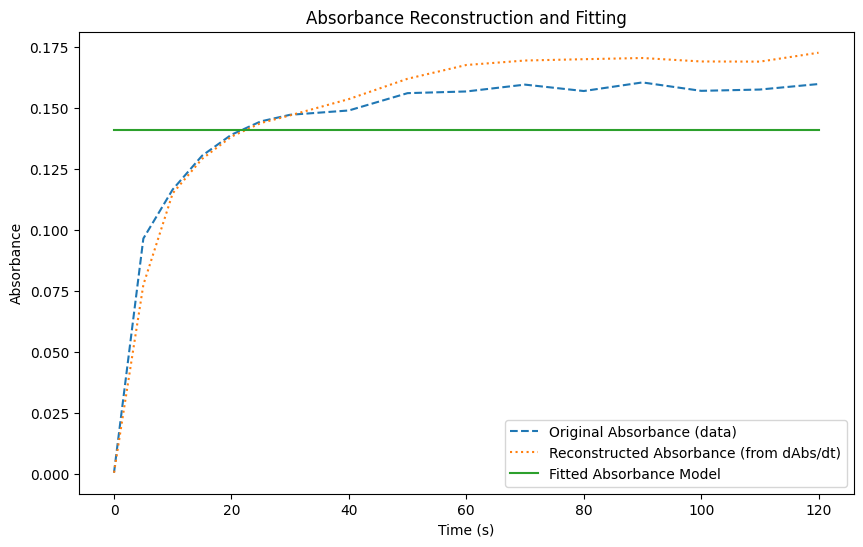

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

# Constants (to be replaced with your values)
epsilon_A = 1822.733  # Molar extinction coefficient (L mol^-1 cm^-1)
I = 1.022*10**16       # Light intensity (photons s^-1 cm^-2)
N_A = 6.022*10**23   # Avogadro's number (mol^-1)
area = 0.25       # Area in cm²

# 1. Load data from Excel
data = pd.read_excel("UV.xlsx")  # Replace with your Excel file name
time = data['Time'].values  # Time in seconds
absorbance = data['Absorbance'].values

# 2. Calculate numerical derivative
def numerical_derivative(time, absorbance):
    derivative = np.zeros_like(absorbance)
    h = time[1] - time[0]  # Assuming uniform time intervals

    # Central difference for interior points
    derivative[1:-1] = (absorbance[2:] - absorbance[:-2]) / (2 * h)

    # Forward and backward difference for boundaries
    derivative[0] = (absorbance[1] - absorbance[0]) / h
    derivative[-1] = (absorbance[-1] - absorbance[-2]) / h

    return derivative

dAbs_dt = numerical_derivative(time, absorbance)

# Use the absolute value of the derivative
dAbs_dt_abs = dAbs_dt

# 3. Numerical integration to reconstruct absorbance
# Initial absorbance value
absorbance_0 = absorbance[0]

# Compute numerical integral
absorbance_reconstructed = cumulative_trapezoid(dAbs_dt, time, initial=0) + absorbance_0

# 4. Define a candidate model for absorbance
def absorbance_model(t, a, b, c):
    return a * np.exp(-b * t) + c  # Example: Exponential decay

# Fit the absorbance model to the reconstructed data
initial_guess = [1, 0.1, 0.1]  # Initial guesses for a, b, c
bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])  # Ensure positive parameters
params, covariance = curve_fit(absorbance_model, time, absorbance_reconstructed, p0=initial_guess, bounds=bounds)

# Extract fitted parameters
a, b, c = params
print(f"Fitted parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")

# Generate the fitted absorbance model
absorbance_fitted = absorbance_model(time, *params)

# 5. Plot and Compare
plt.figure(figsize=(10, 6))
plt.plot(time, absorbance, label="Original Absorbance (data)", linestyle='--')
plt.plot(time, absorbance_reconstructed, label="Reconstructed Absorbance (from dAbs/dt)", linestyle=':')
plt.plot(time, absorbance_fitted, label="Fitted Absorbance Model", linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance")
plt.legend()
plt.title("Absorbance Reconstruction and Fitting")
plt.show()


IT WILL NEVER FIT

Fitted rate constant k: 0.0333


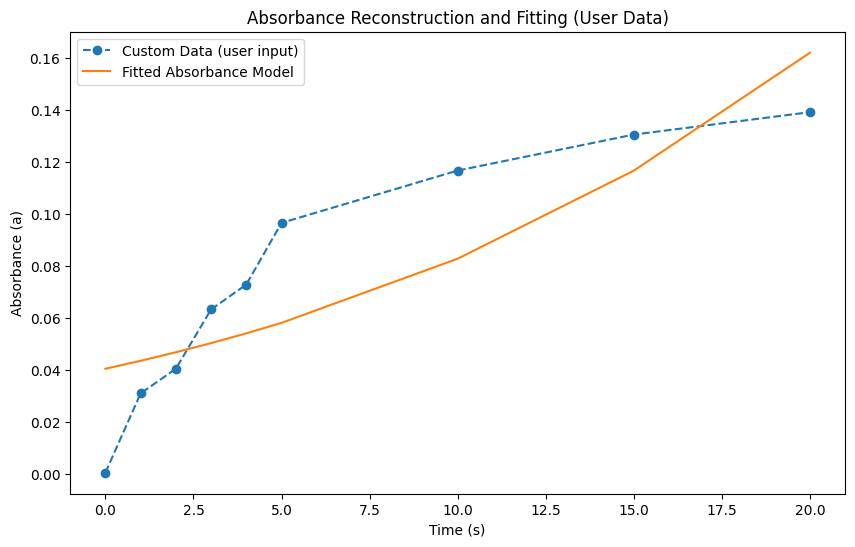

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 1. Define the differential equation: a' = k * (1 - 10^(-a))
def dA_dt(t, a, k):
    return k * (1 - 10**(-a))

# 2. Define the model for curve fitting (same form as the differential equation)
def absorbance_model(t, k):
    sol = solve_ivp(dA_dt, [t[0], t[-1]], [a0], t_eval=t, args=(k,))
    return sol.y[0]

# 3. Take user input for the dataset (time and absorbance values)
# Example: Paste your time and absorbance data manually into the arrays
time_points = np.array([0, 1, 2, 3, 4, 5, 10, 15, 20])  # Replace with your own time data
absorbance_data = np.array([3.30E-04, 0.03084, 0.04034, 0.063158, 0.07275,	0.09647	,0.11661	,0.13046	,0.13908])  # Replace with your own absorbance data

# 4. Initial condition for absorbance
a0 = absorbance_data[2]  # Start with the first data point as the initial condition

# 5. Fit the model to the custom dataset
params, covariance = curve_fit(absorbance_model, time_points, absorbance_data, p0=[0.1])

# 6. Extract fitted parameters
k_fitted = params[0]
print(f"Fitted rate constant k: {k_fitted:.4f}")

# 7. Generate the fitted absorbance curve using the fitted parameter
absorbance_fitted = absorbance_model(time_points, k_fitted)

# 8. Plot and Compare
plt.figure(figsize=(10, 6))
plt.plot(time_points, absorbance_data, label="Custom Data (user input)", linestyle='--', marker='o')
plt.plot(time_points, absorbance_fitted, label="Fitted Absorbance Model", linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance (a)")
plt.legend()
plt.title("Absorbance Reconstruction and Fitting (User Data)")
plt.show()


Fitted rate constant k: 0.1386


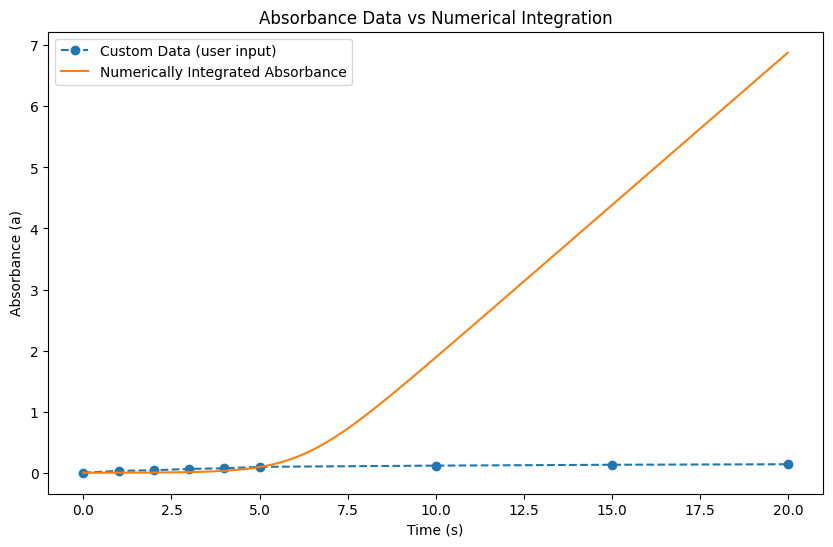

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 1. Define the differential equation: a' = k * (1 - 10^(-a))
def dA_dt(t, a, k):
    return k * (1 - 10**(-a))

# 2. Take user input for the dataset (time and absorbance values)
# Example: Replace with your actual time and absorbance data
time_points = np.array([0, 1, 2, 3, 4, 5, 10, 15, 20])  # Replace with your own time data
absorbance_data = np.array([3.30E-04, 0.03084, 0.04034, 0.063158, 0.07275, 0.09647, 0.11661, 0.13046, 0.13908])  # Replace with your own absorbance data

# 3. Initial condition for absorbance
a0 = absorbance_data[0]  # Start with the first data point as the initial condition

# 4. Fit the model to the custom dataset (Estimate k)
k_estimate = 0.5  # Set your initial guess for k (rate constant)

# 5. Define the time step for integration
time_step = 0.005  # Control the time step (you can adjust this to be smaller for finer control)

# 6. Create a finer time grid with the specified step size
time_fine = np.arange(time_points[0], time_points[-1], time_step)  # Fine time steps for integration

# 7. Solve the differential equation using numerical integration
solution = solve_ivp(dA_dt, [time_points[0], time_points[-1]], [a0], t_eval=time_fine, args=(k_estimate,))

k_fitted = params[0]
print(f"Fitted rate constant k: {k_fitted:.4f}")

# 8. Plot and Compare
plt.figure(figsize=(10, 6))
plt.plot(time_points, absorbance_data, label="Custom Data (user input)", linestyle='--', marker='o')
plt.plot(solution.t, solution.y[0], label="Numerically Integrated Absorbance", linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Absorbance (a)")
plt.legend()
plt.title("Absorbance Data vs Numerical Integration")
plt.show()


Calculated k values: [0.13858694 0.18216997 0.11972955 0.10799145 0.11009641 0.07217235
 0.04329905 0.03145666]


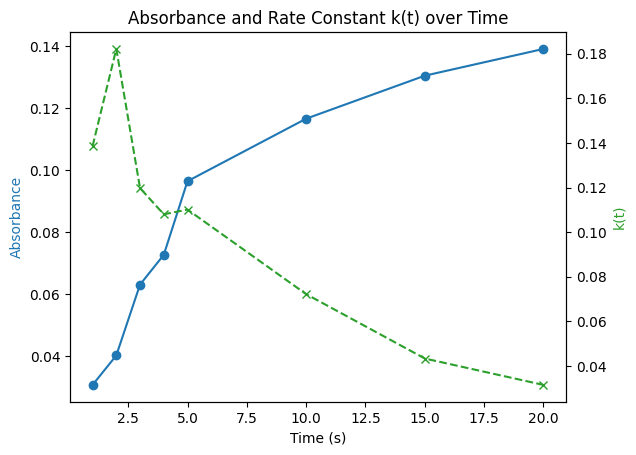

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example absorbance data (replace with actual data)
time_points = np.array([ 1, 2, 3, 4, 5, 10, 15, 20])
absorbance_data = np.array([ 0.03084, 0.04034, 0.063158, 0.07275, 0.09647, 0.11661, 0.13046, 0.13908])

# Function to calculate numerical derivative using finite differences
def numerical_derivative(time, absorbance):
    h = time[1] - time[0]  # Assumes uniform time steps
    derivative = np.zeros_like(absorbance)

    # Central difference for interior points
    derivative[1:-1] = (absorbance[2:] - absorbance[:-2]) / (2 * h)

    # Forward difference for the first point
    derivative[0] = (absorbance[1] - absorbance[0]) / h

    # Backward difference for the last point
    derivative[-1] = (absorbance[-1] - absorbance[-2]) / h

    return derivative

# Calculate the numerical derivative of absorbance
derivative = numerical_derivative(time_points, absorbance_data)

# Calculate k(t) at each time point using the formula k(t) = a'(t) / (1 - 10^(-a(t)))
k_values = derivative / (1 - 10**(-absorbance_data))

# Print the k values at each time step
print(f"Calculated k values: {k_values}")

# Plot absorbance and k(t) values
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Absorbance', color='tab:blue')
ax1.plot(time_points, absorbance_data, color='tab:blue', marker='o', label='Absorbance')

ax2 = ax1.twinx()
ax2.set_ylabel('k(t)', color='tab:green')
ax2.plot(time_points, k_values, color='tab:green', marker='x', label='k(t)', linestyle='--')

plt.title('Absorbance and Rate Constant k(t) over Time')
plt.show()
